In [2]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Reading corpus the text file
with open("LSTM.txt", 'r', encoding='utf-8') as myfile:
    mytext = myfile.read()

In [24]:
mytext

'Introduction to artificial intelligence\nArtificial intelligence applications are all around us, but what does it really mean? In this article, Kumar Abhishek explains the history and progress of artificial intelligence.\n\nArtificial intelligence (AI) is the ability of machines to replicate or enhance human intellect, such as reasoning and learning from experience. Artificial intelligence has been used in computer programs for years, but it is now applied to many other products and services. For example, some digital cameras can determine what objects are present in an image using artificial intelligence software. In addition, experts predict many more innovative uses for artificial intelligence in the future, including smart electric grids.\n\nAI uses techniques from probability theory, economics, and algorithm design to solve practical problems. In addition, the AI field draws upon computer science, mathematics, psychology, and linguistics. Computer science provides tools for desig

In [3]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1

In [26]:
mytokenizer.word_index

{'to': 1,
 'the': 2,
 'and': 3,
 'of': 4,
 'in': 5,
 'ai': 6,
 'a': 7,
 'is': 8,
 'for': 9,
 'that': 10,
 'data': 11,
 'it': 12,
 'from': 13,
 'can': 14,
 'learning': 15,
 'as': 16,
 'on': 17,
 'intelligence': 18,
 'artificial': 19,
 'or': 20,
 'are': 21,
 'this': 22,
 'machine': 23,
 'an': 24,
 'more': 25,
 'be': 26,
 'by': 27,
 'has': 28,
 'but': 29,
 'with': 30,
 'how': 31,
 'such': 32,
 'computer': 33,
 'example': 34,
 'algorithms': 35,
 'we': 36,
 'neural': 37,
 'make': 38,
 'based': 39,
 'machines': 40,
 'have': 41,
 'its': 42,
 'model': 43,
 'models': 44,
 'been': 45,
 'used': 46,
 'many': 47,
 'systems': 48,
 'you': 49,
 'learn': 50,
 'tasks': 51,
 'networks': 52,
 'using': 53,
 'these': 54,
 'one': 55,
 'significant': 56,
 'over': 57,
 'was': 58,
 'also': 59,
 'deep': 60,
 'human': 61,
 'years': 62,
 'other': 63,
 'uses': 64,
 'about': 65,
 'humans': 66,
 'use': 67,
 'recognition': 68,
 'like': 69,
 'e': 70,
 'what': 71,
 'new': 72,
 'do': 73,
 'their': 74,
 'complex': 75,
 't

In [4]:
my_input_sequences = []
for line in mytext.split('\n'):
    #print(line)
    token_list = mytokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        #print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        #print(input_sequences)

In [5]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
my_input_sequences

[[427, 1],
 [427, 1, 19],
 [427, 1, 19, 18],
 [19, 18],
 [19, 18, 176],
 [19, 18, 176, 21],
 [19, 18, 176, 21, 78],
 [19, 18, 176, 21, 78, 134],
 [19, 18, 176, 21, 78, 134, 177],
 [19, 18, 176, 21, 78, 134, 177, 29],
 [19, 18, 176, 21, 78, 134, 177, 29, 71],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260, 261],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260, 261, 5],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260, 261, 5, 22],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260, 261, 5, 22, 262],
 [19, 18, 176, 21, 78, 134, 177, 29, 71, 259, 12, 260, 261, 5, 22, 262, 428],
 [19,
  18,
  176,
  21,
  78,
  134,
  177,
  29,
  71,
  259,
  12,
  260,
  261,
  5,
  22,
  262,
  428,
  429],
 [19,
  18,
  176,
  21,
  78,
  134,
  177,
  29,
  71,
  259,
  12,
  260,
  261,
  5,
  22,
  262,
  428,
  429,
  430],
 [

In [15]:
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 427,   1,  19])

In [8]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [37]:
X[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 427,   1])

In [38]:
y

array([  1,  19,  18, ...,   5,  22, 262])

In [9]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [40]:
y[1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [23]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 154, 100)          102300    
                                                                 
 lstm_1 (LSTM)               (None, 150)               150600    
                                                                 
 dense_1 (Dense)             (None, 1023)              154473    
                                                                 
Total params: 407373 (1.55 MB)
Trainable params: 407373 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
102/102 [==============================] - 25s 220ms/step - loss: 6.4964 - accuracy: 0.0284
Epoch 2/50
102/102 [==============================] - 20s 193ms/step - loss: 6.1151 - accuracy: 0.0327
Epoch 3/50
102/102 [==============================] - 20s 193ms/step - loss: 5.9808 - accuracy: 0.0373
Epoch 4/50
102/102 [==============================] - 20s 196ms/step - loss: 5.8621 - accuracy: 0.0419
Epoch 5/50
102/102 [==============================] - 21s 205ms/step - loss: 5.7266 - accuracy: 0.0598
Epoch 6/50
102/102 [==============================] - 20s 192ms/step - loss: 5.5549 - accuracy: 0.0749
Epoch 7/50
102/102 [==============================] - 20s 193ms/step - loss: 5.3372 - accuracy: 0.0934
Epoch 8/50
102/102 [==============================] - 21s 210ms/step - loss: 5.0906 - accuracy: 0.1147
Epoch 9/50
102/102 [==============================] - 20s 198ms/step - loss: 4.8382 - accuracy: 0.1406
Epoch 10/50
102/102 [==============================] - 21s 202ms/step - l

In [1]:
input_text = "Artificial intelligence"
predict_next_words= 10

for _ in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in mytokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

NameError: name 'mytokenizer' is not defined

In [20]:
model.load_weights("model.keras")

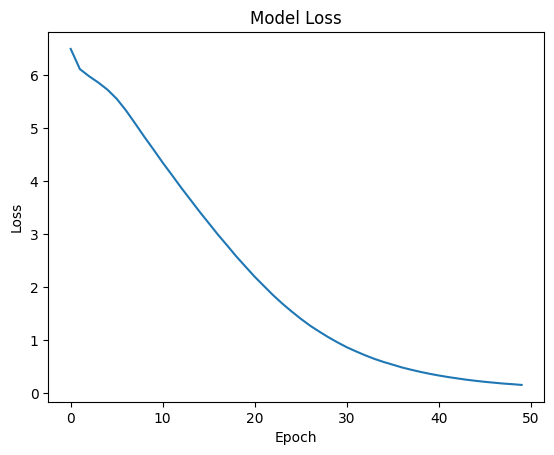

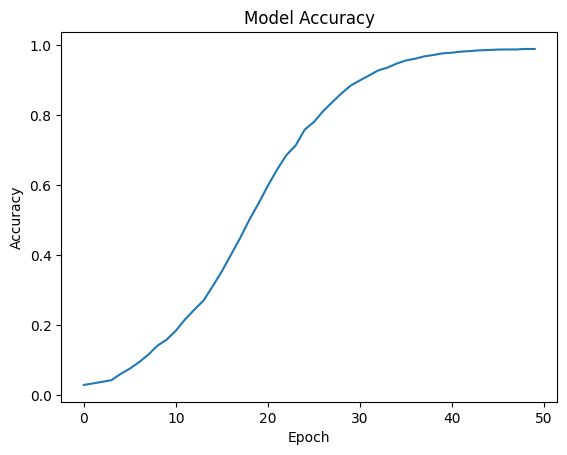

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plotting the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()